# Setting up environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import Imputer
import copy
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.tools.plotting import autocorrelation_plot
import math
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from datetime import timedelta
#from pyramid.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
import model_and_evaluation as models

# Evaluation Models and Optimization

## Grid search to find optimal p, d, q for ARMA, ARIMA, SARIMA

In [6]:
def evaluate_model(model_name, serie, order):
    if model_name.lower() == 'sarima': 
        predictions = models.sarima_rolling_forecast(serie, order)
        
        
    elif model_name.lower() == 'arima': 
        predictions = models.arima_rolling_forecast(serie, order)
     
        
    elif model_name.lower() == 'arma':
        predictions = models.arma_rolling_forecast(serie, order)
        
        
    rmse = sqrt(mean_squared_error(serie[models.train_size:], predictions))
    return rmse



# evaluate combinations of p, d and q values for ARMA, ARIMA, SARIMA model
def grid_search(model_name, country, p_values, d_values, q_values):
    country = country.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_model(model_name, country, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('%s %s   RMSE=%.3f' % (model_name,order,rmse))
                except:
                    continue
    print('Best %s: %s RMSE=%.3f' % (model_name, best_cfg, best_score))

### 1.1 Grid search for ARIMA model - Austria
 It can be observed that the results are more accurate for (p, d, q) of (4, 1, 2)

In [33]:
p_values = range(1, 6)
d_values = range(1, 2)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('ARIMA', models.interpolated_data['Arrivals to Austria'], p_values, d_values, q_values)

ARIMA (1, 1, 1)   RMSE=71.507
ARIMA (1, 1, 2)   RMSE=72.542
ARIMA (1, 1, 3)   RMSE=53.932
ARIMA (1, 1, 4)   RMSE=70.595
ARIMA (1, 1, 5)   RMSE=73.280
ARIMA (2, 1, 1)   RMSE=72.590
ARIMA (2, 1, 2)   RMSE=71.190
ARIMA (2, 1, 3)   RMSE=73.470
ARIMA (2, 1, 5)   RMSE=65.193
ARIMA (3, 1, 1)   RMSE=70.425
ARIMA (3, 1, 2)   RMSE=73.960
ARIMA (3, 1, 4)   RMSE=66.115
ARIMA (4, 1, 1)   RMSE=48.332
ARIMA (4, 1, 2)   RMSE=44.457
ARIMA (4, 1, 3)   RMSE=68.700
ARIMA (5, 1, 3)   RMSE=78.184
Best ARIMA: (4, 1, 2) RMSE=44.457


### 1.2   Grid search for ARIMA model - Mainland Greece
 It can be observed that the results are more accurate for (p, d, q) of (2, 1, 5)

In [13]:
p_values = range(1, 6)
d_values = range(1, 2)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('ARIMA', models.interpolated_data['Departures to mainland Greece'], p_values, d_values, q_values)

ARIMA (1, 1, 1)   RMSE=173.132
ARIMA (1, 1, 2)   RMSE=170.712
ARIMA (1, 1, 3)   RMSE=165.591
ARIMA (1, 1, 4)   RMSE=168.629
ARIMA (1, 1, 5)   RMSE=154.887
ARIMA (2, 1, 1)   RMSE=169.163
ARIMA (2, 1, 2)   RMSE=175.111
ARIMA (2, 1, 5)   RMSE=80.451
ARIMA (3, 1, 1)   RMSE=143.383
ARIMA (3, 1, 4)   RMSE=168.870
ARIMA (4, 1, 1)   RMSE=127.641
ARIMA (4, 1, 3)   RMSE=104.649
ARIMA (5, 1, 1)   RMSE=109.082
ARIMA (5, 1, 2)   RMSE=94.893
Best ARIMA: (2, 1, 5) RMSE=80.451


### 1.3   Grid search for ARIMA model - Hungary
 It can be observed that the results are more accurate for (p, d, q) of (4, 1, 1)

In [7]:
p_values = range(1, 6)
d_values = range(1, 2)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('ARIMA', interpolated_data['Arrivals to Hungary'], p_values, d_values, q_values)

ARIMA (2, 1, 1)   RMSE=19.088
ARIMA (3, 1, 1)   RMSE=15.782
ARIMA (3, 1, 2)   RMSE=16.072
ARIMA (4, 1, 1)   RMSE=15.391
ARIMA (4, 1, 2)   RMSE=17.657
ARIMA (5, 1, 1)   RMSE=16.285
ARIMA (5, 1, 3)   RMSE=34.773
Best ARIMA: (4, 1, 1) RMSE=15.391


### 2.1 Grid search for ARMA model - Austria
It can be observed that the results are more accurate for (p, d, q) of (2, 0, 5)

In [58]:
p_values = range(1, 6)
d_values = range(0, 1)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('ARMA', models.interpolated_data['Arrivals to Austria'], p_values, d_values, q_values)

ARMA (1, 0, 1)   RMSE=82.200
ARMA (1, 0, 2)   RMSE=63.166
ARMA (1, 0, 3)   RMSE=57.752
ARMA (1, 0, 4)   RMSE=52.783
ARMA (1, 0, 5)   RMSE=56.636
ARMA (2, 0, 1)   RMSE=53.763
ARMA (2, 0, 4)   RMSE=53.344
ARMA (2, 0, 5)   RMSE=37.606
ARMA (3, 0, 1)   RMSE=54.260
ARMA (3, 0, 5)   RMSE=51.062
ARMA (4, 0, 1)   RMSE=53.790
ARMA (4, 0, 4)   RMSE=55.360
ARMA (5, 0, 1)   RMSE=65.795
ARMA (5, 0, 3)   RMSE=40.893
Best ARMA: (2, 0, 5) RMSE=37.606


### 2.2  Grid search for ARMA model - Mainland Greece
It can be observed that the results are more accurate for (p, d, q) of (2, 0, 3)

In [12]:
p_values = range(1, 6)
d_values = range(0, 1)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('ARMA', models.interpolated_data['Departures to mainland Greece'], p_values, d_values, q_values)

ARMA (1, 0, 1)   RMSE=160.091
ARMA (1, 0, 2)   RMSE=64.475
ARMA (1, 0, 3)   RMSE=59.968
ARMA (1, 0, 4)   RMSE=60.205
ARMA (1, 0, 5)   RMSE=62.392
ARMA (2, 0, 1)   RMSE=59.895
ARMA (2, 0, 2)   RMSE=58.980
ARMA (2, 0, 3)   RMSE=58.960
ARMA (2, 0, 4)   RMSE=62.504
ARMA (2, 0, 5)   RMSE=63.073
ARMA (4, 0, 1)   RMSE=61.305
ARMA (5, 0, 1)   RMSE=62.740
Best ARMA: (2, 0, 3) RMSE=58.960


### 2.3  Grid search for ARMA model - Hungary
It can be observed that the results are more accurate for (p, d, q) of (1, 0, 2)

In [15]:
p_values = range(1, 6)
d_values = range(0, 1)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('ARMA', models.interpolated_data['Arrivals to Hungary'], p_values, d_values, q_values)

ARMA (1, 0, 1)   RMSE=24.796
ARMA (1, 0, 2)   RMSE=24.709
ARMA (2, 0, 2)   RMSE=51.556
ARMA (2, 0, 4)   RMSE=77.366
ARMA (3, 0, 3)   RMSE=38.363
ARMA (3, 0, 4)   RMSE=53.962
ARMA (3, 0, 5)   RMSE=75.583
ARMA (4, 0, 4)   RMSE=68.050
Best ARMA: (1, 0, 2) RMSE=24.709


### 3.1 Grid search for SARIMA model - Austria
It can be observed that the results are more accurate for (p, d, q) of (3, 1, 2)

In [35]:
p_values = range(1, 6)
d_values = range(1, 2)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('SARIMA', models.interpolated_data['Arrivals to Austria'], p_values, d_values, q_values)

SARIMA (1, 1, 1)   RMSE=36.679
SARIMA (1, 1, 2)   RMSE=36.620
SARIMA (1, 1, 3)   RMSE=36.592
SARIMA (1, 1, 4)   RMSE=37.036
SARIMA (1, 1, 5)   RMSE=36.873
SARIMA (2, 1, 1)   RMSE=36.628
SARIMA (2, 1, 2)   RMSE=36.625
SARIMA (2, 1, 3)   RMSE=36.840
SARIMA (2, 1, 4)   RMSE=39.107
SARIMA (2, 1, 5)   RMSE=37.821
SARIMA (3, 1, 1)   RMSE=36.624
SARIMA (3, 1, 2)   RMSE=36.568
SARIMA (3, 1, 3)   RMSE=41.957
SARIMA (3, 1, 4)   RMSE=36.972
SARIMA (4, 1, 1)   RMSE=37.598
SARIMA (4, 1, 2)   RMSE=37.773
SARIMA (4, 1, 3)   RMSE=42.271
SARIMA (5, 1, 1)   RMSE=37.756
SARIMA (5, 1, 2)   RMSE=37.684
Best SARIMA: (3, 1, 2) RMSE=36.568


### 3.2 Grid search for SARIMA model - Mainland Greece
It can be observed that the results are more accurate for (p, d, q) of (5, 1, 1)

In [14]:
p_values = range(1, 6)
d_values = range(1, 2)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('SARIMA', models.interpolated_data['Departures to mainland Greece'], p_values, d_values, q_values)

SARIMA (1, 1, 1)   RMSE=27.797
SARIMA (1, 1, 2)   RMSE=27.513
SARIMA (1, 1, 3)   RMSE=27.439
SARIMA (1, 1, 4)   RMSE=29.201
SARIMA (1, 1, 5)   RMSE=43.309
SARIMA (2, 1, 4)   RMSE=28.436
SARIMA (2, 1, 5)   RMSE=46.487
SARIMA (3, 1, 1)   RMSE=27.716
SARIMA (3, 1, 4)   RMSE=78.280
SARIMA (3, 1, 5)   RMSE=51.571
SARIMA (4, 1, 1)   RMSE=27.306
SARIMA (4, 1, 4)   RMSE=46.002
SARIMA (4, 1, 5)   RMSE=45.269
SARIMA (5, 1, 1)   RMSE=27.176
SARIMA (5, 1, 4)   RMSE=108.986
SARIMA (5, 1, 5)   RMSE=100.722
Best SARIMA: (5, 1, 1) RMSE=27.176


### 3.3 Grid search for SARIMA model - Hungary
It can be observed that the results are more accurate for (p, d, q) of (3, 1, 1)

In [17]:
p_values = range(1, 6)
d_values = range(1, 2)
q_values = range(1, 6)
warnings.filterwarnings("ignore")
grid_search('SARIMA', models.interpolated_data['Arrivals to Hungary'], p_values, d_values, q_values)

SARIMA (1, 1, 1)   RMSE=13.333
SARIMA (1, 1, 2)   RMSE=35.973
SARIMA (1, 1, 3)   RMSE=17.430
SARIMA (1, 1, 4)   RMSE=84.095
SARIMA (1, 1, 5)   RMSE=147.503
SARIMA (2, 1, 2)   RMSE=13.140
SARIMA (2, 1, 3)   RMSE=13.534
SARIMA (2, 1, 5)   RMSE=195.970
SARIMA (3, 1, 1)   RMSE=13.006
SARIMA (3, 1, 2)   RMSE=15.992
SARIMA (4, 1, 1)   RMSE=13.054
SARIMA (4, 1, 3)   RMSE=23.219
SARIMA (4, 1, 4)   RMSE=88.009
SARIMA (5, 1, 1)   RMSE=13.049
SARIMA (5, 1, 4)   RMSE=77.087
Best SARIMA: (3, 1, 1) RMSE=13.006


## Nested Cross validation for AR model
The AR model which had an RMSE value of 47.91 previously is improved to RMSE of 23.06 for the <b>train_size</b> of 317

In [79]:
def nested_cross_validation(country, split):
    
    tscv = TimeSeriesSplit(n_splits = split)
    result = []
    rmse = []
    

    for train_index, test_index in tscv.split(country):
        cv_train, cv_test = country.iloc[train_index], country.iloc[test_index]
        model = ARIMA(cv_train, order=(3,1,0))
        model_fit = model.fit(disp=-1)
        predictions = model_fit.forecast(steps=4)[0]
        true_values = cv_test.values[:4]
        result.append([sqrt(mean_squared_error(true_values, predictions)), train_index[-1], test_index[0]])
        print('RMSE: %s    Train_split_Index = %s' % (sqrt(mean_squared_error(true_values, predictions)), train_index[-1]))
            
    return result


split = 8
print ('split = %d' % (split))
result = nested_cross_validation(models.interpolated_data['Arrivals to Austria'], split)
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 8
RMSE: 844.3745212652724    Train_split_Index = 44
RMSE: 1030.2211268126443    Train_split_Index = 83
RMSE: 1547.8808780217817    Train_split_Index = 122
RMSE: 106.50808411489379    Train_split_Index = 161
RMSE: 96.69612095183794    Train_split_Index = 200
RMSE: 65.01291210106305    Train_split_Index = 239
RMSE: 23.062452018564333    Train_split_Index = 278
RMSE: 55.95230251968453    Train_split_Index = 317
Best split index for the model is: 278 which has RMSE value of: 23.062452018564333


## Nested cross validation for Rolling forecast models - ARMA, ARIMA, SARIMA

In [20]:
def nested_cross_validation_diff(country, split, order, model_name):
    tscv = TimeSeriesSplit(n_splits = split)
    result = []
    rmse = []
    

    for train_index, test_index in tscv.split(country):
        cv_train, cv_test = country.iloc[train_index], country.iloc[test_index]
        predictions = list()
        history = [x for x in cv_train]
        test = [x for x in cv_test]
        
        try:

            for t in range(len(cv_test)):
                
                if (model_name.lower() == 'arma' or model_name.lower() == 'arima'):
                    model = ARIMA(history, order=order)
                    model_fit = model.fit(disp=-1)
                    yhat_f = model_fit.forecast()[0][0]
                    
                elif (model_name.lower() == 'sarima'):
                    model = sm.tsa.statespace.SARIMAX(cv_train, order=order, seasonal_order=(1,0,0,1))
                    model_fit = model.fit(disp=-1)
                    yhat_f = model_fit.forecast()[0]
               
                predictions.append(yhat_f)
                history.append(test[t])


            true_values = cv_test.values
            result.append([sqrt(mean_squared_error(true_values, predictions)), train_index[-1], test_index[0]])
            print('RMSE: %s    Train_split_Index = %s' % (sqrt(mean_squared_error(true_values, predictions)), train_index[-1]))
        
        
        except Exception as e:
            continue
        
    return result

### 1.1  Nested Cross validation for ARIMA model - Austria

The RMSE value is improved from 44.4 to 43.71 for a <b>train_size</b> of 312.

In [31]:
split, order = 7, (4,1,2)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Arrivals to Austria'], split, order, 'ARIMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 7
RMSE: 691.6646079684668    Train_split_Index = 92
RMSE: 355.5627085708323    Train_split_Index = 136
RMSE: 66.27237824689578    Train_split_Index = 180
RMSE: 62.792605178880905    Train_split_Index = 224
RMSE: 104.30147333226428    Train_split_Index = 268
RMSE: 43.7123910897369    Train_split_Index = 312
Best split index for the model is: 312 which has RMSE value of: 43.7123910897369


### 1.2  Nested Cross validation for ARIMA model - Mainland Greece

The RMSE value is improved from 80.45 to 74.32 for a <b>train_size</b> of 312.

In [21]:
split, order = 7, (2,1,5)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Departures to mainland Greece'], split, order, 'ARIMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 7
RMSE: 1116.5098838618667    Train_split_Index = 136
RMSE: 351.06496288227936    Train_split_Index = 180
RMSE: 367.8531386758308    Train_split_Index = 224
RMSE: 102.5475202060516    Train_split_Index = 268
RMSE: 74.3235598800628    Train_split_Index = 312
Best split index for the model is: 312 which has RMSE value of: 74.3235598800628


### 1.3  Nested Cross validation for ARIMA model - Hungary
The RMSE value is improved from 15.39 to 11.61 for a <b>train_size</b> of 331. 

In [22]:
split, order = 13, (4,1,1)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Arrivals to Hungary'], split, order, 'ARIMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 13
RMSE: 67.26755234500821    Train_split_Index = 31
RMSE: 41.84052697672583    Train_split_Index = 56
RMSE: 48.018679762742764    Train_split_Index = 81
RMSE: 37.12413888854919    Train_split_Index = 106
RMSE: 82.31844228633489    Train_split_Index = 131
RMSE: 61.16829402390484    Train_split_Index = 156
RMSE: 81.77578729259433    Train_split_Index = 181
RMSE: 61.61502975623767    Train_split_Index = 206
RMSE: 60.3961112894517    Train_split_Index = 231
RMSE: 82.37103227690329    Train_split_Index = 256
RMSE: 17.01237322819493    Train_split_Index = 281
RMSE: 16.9866091137835    Train_split_Index = 306
RMSE: 11.6148562643349    Train_split_Index = 331
Best split index for the model is: 331 which has RMSE value of: 11.6148562643349


### 2.1 Nested Cross validation for ARMA model - Austria
The RMSE value is not improved in this case.

In [26]:
split, order = 5, (2,0,5)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Arrivals to Austria'], split, order, 'ARMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 5
RMSE: 39.43043981097089    Train_split_Index = 297
Best split index for the model is: 297 which has RMSE value of: 39.43043981097089


### 2.2 Nested Cross validation for ARMA model - Mainland Greece
The RMSE value is improved from 58.9 to 49.59 for a <b>train_size</b> of 329

In [25]:
split, order = 12, (2,0,3)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Departures to mainland Greece'], split, order, 'ARMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 12
RMSE: 1584.340967895833    Train_split_Index = 86
RMSE: 1576.7400550158613    Train_split_Index = 113
RMSE: 1103.937536096411    Train_split_Index = 140
RMSE: 920.9148956389354    Train_split_Index = 167
RMSE: 81.54055336318402    Train_split_Index = 248
RMSE: 64.86791103350323    Train_split_Index = 275
RMSE: 63.382694095041536    Train_split_Index = 302
RMSE: 49.593224873885156    Train_split_Index = 329
Best split index for the model is: 329 which has RMSE value of: 49.593224873885156


### 2.3 Nested Cross validation for ARMA model - Hungary
The RMSE value is improved from 24.7 to 22.59 for a <b>train_size</b> of 321

In [27]:
# Didn't change
split, order = 9, (1,0,2)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Arrivals to Hungary'], split, order, 'ARMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 9
RMSE: 116.61771147403299    Train_split_Index = 41
RMSE: 74.99028667778097    Train_split_Index = 76
RMSE: 63.88807376317829    Train_split_Index = 111
RMSE: 76.83306029373658    Train_split_Index = 146
RMSE: 82.59883803180453    Train_split_Index = 181
RMSE: 58.900167917380614    Train_split_Index = 216
RMSE: 75.35471748975108    Train_split_Index = 251
RMSE: 26.76710934411395    Train_split_Index = 286
RMSE: 22.597997184273567    Train_split_Index = 321
Best split index for the model is: 321 which has RMSE value of: 22.597997184273567


### 3.1 Nested Cross validation for SARIMA model - Austria
The RMSE value is improved from 36.5 to 33.53 for a <b>train_size</b> of 292.

In [28]:
split, order = 10, (3,1,2)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Arrivals to Austria'], split, order, 'SARIMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 10
RMSE: 3286.933640627711    Train_split_Index = 36
RMSE: 2109.3032590359344    Train_split_Index = 68
RMSE: 1135.1525875910902    Train_split_Index = 100
RMSE: 2193.601298258403    Train_split_Index = 132
RMSE: 57.894561093840665    Train_split_Index = 164
RMSE: 47.56327685871016    Train_split_Index = 196
RMSE: 47.52961848239436    Train_split_Index = 228
RMSE: 90.15323732427362    Train_split_Index = 260
RMSE: 33.53081667950504    Train_split_Index = 292
RMSE: 54.3797204974297    Train_split_Index = 324
Best split index for the model is: 292 which has RMSE value of: 33.53081667950504


### 3.2 Nested Cross validation for SARIMA model - Mainland Greece
The RMSE value is not improved in this case.

In [29]:
split, order = 7, (5,1,1)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Departures to mainland Greece'], split, order, 'SARIMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 7
RMSE: 2904.6870159358923    Train_split_Index = 48
RMSE: 1429.4825957274195    Train_split_Index = 92
RMSE: 1230.4211568436767    Train_split_Index = 136
RMSE: 460.02290722564527    Train_split_Index = 180
RMSE: 33.04539349142292    Train_split_Index = 224
RMSE: 31.475733374568485    Train_split_Index = 268
RMSE: 31.004681954914478    Train_split_Index = 312
Best split index for the model is: 312 which has RMSE value of: 31.004681954914478


### 3.3 Nested Cross validation for SARIMA model - Hungary
The RMSE value is improved from 13.06 to 8.47 for a train_size of 329

In [30]:
split, order = 12, (3,1,1)
print ('split = %d' % (split))
result = nested_cross_validation_diff(models.interpolated_data['Arrivals to Hungary'], split, order, 'SARIMA')
print ('Best split index for the model is: %s which has RMSE value of: %s' % ((min(result)[1]), (min(result)[0])))

split = 12
RMSE: 19.35256583175748    Train_split_Index = 32
RMSE: 11.29035129706494    Train_split_Index = 59
RMSE: 27.30304593913658    Train_split_Index = 86
RMSE: 29.234525610571527    Train_split_Index = 113
RMSE: 78.31272024249697    Train_split_Index = 140
RMSE: 99.3875453198442    Train_split_Index = 167
RMSE: 59.4969648150255    Train_split_Index = 194
RMSE: 47.41849815235792    Train_split_Index = 221
RMSE: 69.32307720325844    Train_split_Index = 248
RMSE: 87.20975393172547    Train_split_Index = 275
RMSE: 17.77149402074804    Train_split_Index = 302
RMSE: 8.476625593994815    Train_split_Index = 329
Best split index for the model is: 329 which has RMSE value of: 8.476625593994815


# Out of Sample Forecasts for next 20 days using SARIMA model

In [16]:
def sarima_out_of_sample_rolling_forecast(country, order, train_size, no_of_days):
    
    train, test = country[0:train_size], country[train_size:]
    history = [country for country in train]
    predictions_f = list()
    ind = list()
    timeindex = models.interpolated_data['Arrivals to Austria'].index
    
    for t in range(no_of_days):
        last_date = models.interpolated_data['Arrivals to Austria'].iloc[[-1]].index
        last_date = last_date + timedelta(days=t)
        timeindex = timeindex.union(last_date)
        model = sm.tsa.statespace.SARIMAX(history, order=order, seasonal_order=(1,0,0,1))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        yhat = math.ceil(yhat)
        predictions_f.append(yhat)
        obs = yhat
        last_date = last_date + timedelta(days = t)
        ind.append(last_date)
        history.append(obs)

    pred = pd.DataFrame(index = timeindex, columns=['Arrivals to Austria'])
    
    # Assigning out-sampling forecasted values
    for i in range(1, no_of_days+1):
        pred['Arrivals to Austria'].iloc[-i] = predictions_f[i-1]
        
    # Assigning original previous values    
    for i in range(0, len(interpolated_data)):
        pred['Arrivals to Austria'].iloc[i] = models.interpolated_data['Arrivals to Austria'].iloc[i]

    return (pred)





no_of_days = 20      # the number of days in the future to forecast
order = (5,1,2)
train_size = len(models.interpolated_data)
print('Out of Sample Forcasts for the upcoming %d days'%no_of_days)
pred = sarima_out_of_sample_rolling_forecast(models.interpolated_data['Arrivals to Austria'], order, train_size, no_of_days)
pred[-no_of_days+1:]

Out of Sample Forcasts for the upcoming 20 days


,Arrivals to Austria
Date,
2016-09-22,113
2016-09-23,113
2016-09-24,113
2016-09-25,113
2016-09-26,113
2016-09-27,112
2016-09-28,112
2016-09-29,111
2016-09-30,110


## Plot of the count of refugees from August to October.

#### The red line indicates the original values whereas the blue line indicates the future predicted values.

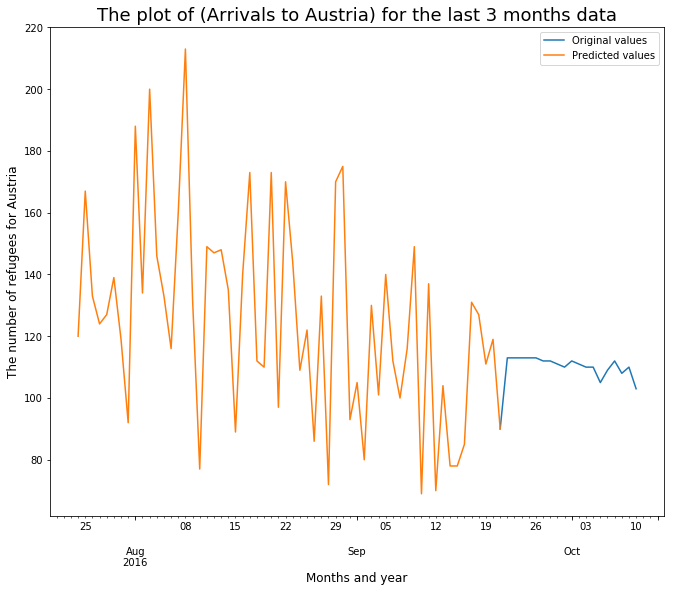

In [17]:
rcParams['figure.figsize'] = 11, 9
ax = pred[-no_of_days:].plot()
models.interpolated_data['Arrivals to Austria'][-60:].plot(ax=ax)
plt.title('The plot of (Arrivals to Austria) for the last 3 months data', fontsize = 18)
plt.ylabel('The number of refugees for Austria', fontsize = 12)
plt.xlabel('Months and year', fontsize = 12)
plt.legend(['Original values','Predicted values'])